# Trabalho Final Deep Learning
 Baseado no arquivo '300 images of squares, circles, and triangles', localizado no Kaggle

https://www.kaggle.com/datasets/cactus3/basicshapes/download?datasetVersionNumber=1

### Problema:
- classificar uma base de dados pequena em quadrados, círculos e triângulos

### imports iniciais

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
import random
from matplotlib import image
from sklearn.metrics import accuracy_score

### demonstrando base de dados

In [2]:
filepath = os.path.join(os.path.join(os.getcwd(), 'shapes'), 'shapes')
tipos = sorted(os.listdir(filepath))
print ('tipos de desenhos:', tipos)

tipos de desenhos: ['circles', 'squares', 'triangles']


<BarContainer object of 3 artists>

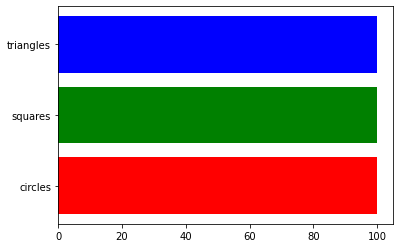

In [3]:
#observando quantidade de imagens por tipo
qtds = [len(os.listdir(os.path.join(filepath, tipo))) for tipo in tipos]
plt.barh(tipos, qtds, color = ['red', 'green', 'blue'])

notamos acima que **não há enviesamento nos dados**.

### tratando a pouca quantidade de dados

Para resolver o problema, precisaremos gerar imagens que sirvam como insumo para o modelo.

Faremos isso usando o ImageDataGenerator:

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
#plottando uma imagem aleatória
def randFile(path):
    randfolder = (os.path.join(path, \
                       os.listdir(path)[random.randint(0, len(os.listdir(filepath))-1)]))
    randfile = (os.path.join(randfolder, \
                       os.listdir(randfolder)[random.randint(0, len(os.listdir(randfolder))-1)]))
    return randfile

def plotImg(img):
    try:
        plt.imshow(plt.imread(img))
    except:
        plt.imshow(img, vmin=0, vmax=255)
    
def showNpImg(file):
    np.set_printoptions(linewidth=np.inf)
    try:
        print(np.round(image.imread(file)[:,:,0],1).astype(np.uint8))
    except:
        print(np.round(file[:,:,0],1).astype(np.uint8))

Demonstrando generator

In [6]:
#obtendo arquivo aleatório e gerando arquivo com base neste
randfile = randFile(filepath)
gen = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1,
                        height_shift_range = 0.1, horizontal_flip = True,
                        rescale=1/255., validation_split=0.2)
gen_iter = gen.flow(np.expand_dims(plt.imread(randfile),0))
#gerando modificações da imagem acima
gen_img = next(gen_iter)[0]

In [7]:
showNpImg(randfile) #imagem original

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 

In [8]:
showNpImg(gen_img) ###imagem gerada

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

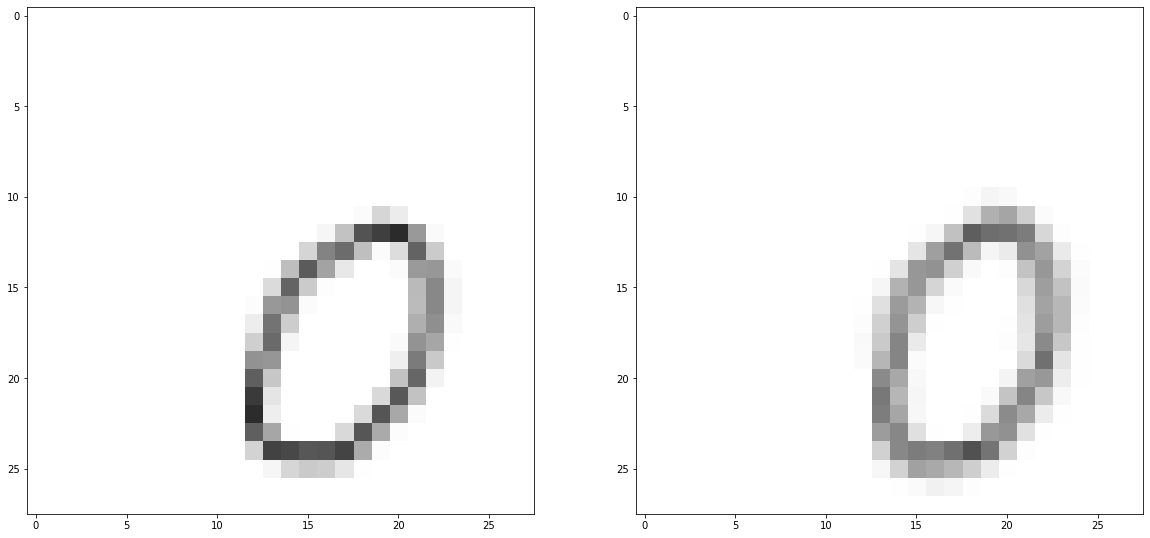

In [9]:
#demonstrando imagens lado a lado
fig, axes = plt.subplots(1,2,figsize = (20,20))
axes = axes.flatten()
for img, ax in zip([image.imread(randfile), gen_img*255],axes):
    ax.imshow(img, vmin=0, vmax=255)

### Modelo

In [10]:
#usando o gerador para obter classes dos diretórios e gerar imagens, separando em treino e teste
treino = gen.flow_from_directory(filepath, color_mode = 'rgb',
                                target_size = (28,28), shuffle = True, class_mode = 'categorical'
                                ,seed=42, batch_size = 32, subset = 'training')
teste = gen.flow_from_directory(filepath, color_mode = 'rgb',
                                target_size = (28,28), shuffle = True, class_mode = 'categorical'
                                ,seed=42, batch_size = 32, subset = 'validation')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [11]:
teste.class_indices

{'circles': 0, 'squares': 1, 'triangles': 2}

construindo CNN

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Reshape
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
!pip install visualkeras
import visualkeras

In [17]:
# construindo camadas convolucionais
model=Sequential()
callback = [EarlyStopping(monitor='loss', patience=3, mode="auto")]

model.add(Conv2D(32,activation='relu', kernel_size=3, input_shape=(28,28,3)))
model.add(Conv2D(64,activation='relu', kernel_size=3))
model.add(Conv2D(128,activation='relu', kernel_size=3))
model.add(Conv2D(256,activation='relu', kernel_size=3))

model.add(Flatten())
#cmodel.add(Dense(500,activation='softmax'))

model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 256)       295168    
                                                                 
 flatten_1 (Flatten)         (None, 102400)            0         
                                                                 
 dense_1 (Dense)             (None, 3)                 307203    
                                                                 
Total params: 695,619
Trainable params: 695,619
Non-tr

In [18]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate = 0.001),
    loss=keras.losses.categorical_crossentropy,
    metrics=["accuracy"]
)

In [ ]:
model.fit(treino, validation_data=teste, callbacks=callback, epochs=50)

Epoch 1/50
8/8 [==============================] - 4s 403ms/step - loss: 1.2398 - accuracy: 0.3375 - val_loss: 1.1319 - val_accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 3s 368ms/step - loss: 1.1098 - accuracy: 0.3042 - val_loss: 1.1001 - val_accuracy: 0.3333
Epoch 3/50
8/8 [==============================] - 3s 361ms/step - loss: 1.0999 - accuracy: 0.3333 - val_loss: 1.0961 - val_accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 3s 362ms/step - loss: 1.0963 - accuracy: 0.3417 - val_loss: 1.0925 - val_accuracy: 0.5000
Epoch 5/50
8/8 [==============================] - 3s 363ms/step - loss: 1.0859 - accuracy: 0.3917 - val_loss: 1.0596 - val_accuracy: 0.4667
Epoch 6/50
8/8 [==============================] - 3s 389ms/step - loss: 1.0527 - accuracy: 0.4083 - val_loss: 0.9725 - val_accuracy: 0.4667
Epoch 7/50
8/8 [==============================] - 3s 363ms/step - loss: 1.0524 - accuracy: 0.4708 - val_loss: 1.0268 - val_accuracy: 0.4333
Epoch 8/50
8/8 [====

### predizendo tipos de imagens aleatoriamente

In [ ]:
def randomPred(filepath):
    randfile = image.imread(randFile(filepath))
    pred = model.predict(np.expand_dims(randfile, axis=0)).argmax(axis=-1)
    plotImg(randfile)
    print (tipos[pred[0]])
randomPred(filepath)

### predizendo um desenho que fiz no paint

In [ ]:
meu_desenho = image.imread(os.path.join(os.getcwd(),'meu_desenho.png'))
plt.imshow(meu_desenho)
print (tipos[model.predict(np.expand_dims(meu_desenho, axis=0)).argmax(axis=-1)[0]])